In [3]:
#Kmeans clustering is a type of clustering method that sub-divides a single cluster or a collection of data-points into k differentcluster or grp
#It is an unsupervised learning algorithm which groups the unlevel dataset into different clusters 
#it is a centroid based algorithm where each cluster is associated with centroid. The main aim of this algorithm is to minimize the sum of distances between the datapoint and their corresponding clusters.
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [4]:
Data={'x':[185,170,168,179,182,188,180,180,183,180,180,177],
      'y':[72,56,60,68,72,77,71,70,84,88,67,76]
     }
Data

{'x': [185, 170, 168, 179, 182, 188, 180, 180, 183, 180, 180, 177],
 'y': [72, 56, 60, 68, 72, 77, 71, 70, 84, 88, 67, 76]}

In [6]:
df= DataFrame(Data,columns=['x','y'])

In [8]:
print("The shape of the data is",df.shape)
df

The shape of the data is (12, 2)


,x,y
0,185,72
1,170,56
2,168,60
3,179,68
4,182,72
5,188,77
6,180,71
7,180,70
8,183,84
9,180,88


In [9]:
#For the choice of the no. of cluster we go for the elbow method. In this method we are actually varing the no. of clusters(e.g-1 to 10/15).For each value of k we calculate WCSS(within-cluster-sumof-squares)
#WCSS is basically the sum of square distance between each points and the centroid in a cluster .
#We plot the WCSS value with the k value, the plot looks like an elbow.
wcss=[]
for i in range(1,13):
    km= KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [10]:
wcss

[1236.9166666666667,
 526.9000000000001,
 195.23809523809524,
 104.16666666666667,
 67.91666666666667,
 37.75,
 25.25,
 15.25,
 5.666666666666666,
 1.5,
 0.5,
 0.0]

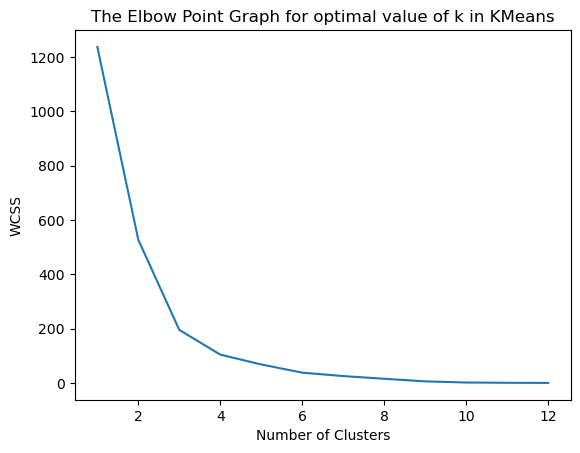

In [11]:
plt.plot(range(1,13),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title('The Elbow Point Graph for optimal value of k in KMeans')
plt.show()

In [12]:
#kmeans centroid clustering
my_centroids= np.array([[185,72],[170,56],[168,60]])
kmeans=KMeans(n_clusters=3, init=my_centroids).fit(df)

/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
centroids=kmeans.cluster_centers_
print(centroids)

[[181.4  74.5]
 [170.   56. ]
 [168.   60. ]]


In [19]:
X=df.iloc[:,:].values
y_kmeans= kmeans.fit_predict(X)
y_kmeans

/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

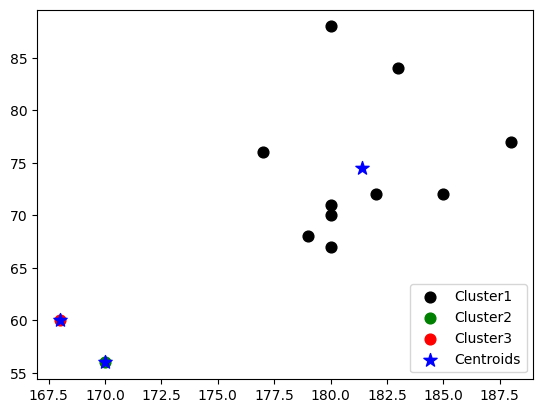

In [21]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s=60,c='black',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s=60,c='green',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s=60,c='red',label='Cluster3')
plt.scatter(centroids[:,0],centroids[:,1],s=100,c='blue',marker='*',label='Centroids')
plt.legend(loc='lower right')
plt.show()